<a href="https://colab.research.google.com/github/luasampaio/data-engineering/blob/main/24_ntb_Analytics_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurações Iniciais e Importações**



In [5]:
# Import necessary libraries
!pip install pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Ensure inline plotting
%matplotlib inline

-  Lendo a URL


In [6]:
# Create a SparkSession
spark = SparkSession.builder.appName("LucianaSampaioApp").getOrCreate()

# URL para o conteúdo bruto do arquivo CSV
url = 'https://raw.githubusercontent.com/luasampaio/datasets/main/products.csv'

### Convert para pandas

In [7]:
# Lê o arquivo CSV diretamente do URL using pandas
pandas_df = pd.read_csv(url)

In [9]:
# Create a Spark DataFrame from the pandas DataFrame
df = spark.createDataFrame(pandas_df)

In [10]:
pandas_df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [11]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    321 non-null    int64  
 1   product_name  321 non-null    object 
 2   brand_id      321 non-null    int64  
 3   category_id   321 non-null    int64  
 4   model_year    321 non-null    int64  
 5   list_price    321 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.2+ KB


In [12]:
pandas_df.describe()

,product_id,brand_id,category_id,model_year,list_price
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,161.000000,5.476636,4.028037,2017.591900,1520.591402
std,92.808944,3.708131,2.188569,0.665063,1612.152765
min,1.000000,1.000000,1.000000,2016.000000,89.990000
25%,81.000000,1.000000,2.000000,2017.000000,439.990000
50%,161.000000,7.000000,3.000000,2018.000000,761.990000
75%,241.000000,9.000000,6.000000,2018.000000,2299.990000
max,321.000000,9.000000,7.000000,2019.000000,11999.990000


In [13]:
# Verificando valores faltantes

pandas_df.isnull()

,product_id,product_name,brand_id,category_id,model_year,list_price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [14]:
# Verificar valores nulos
pandas_df.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
category_id,0
model_year,0
list_price,0


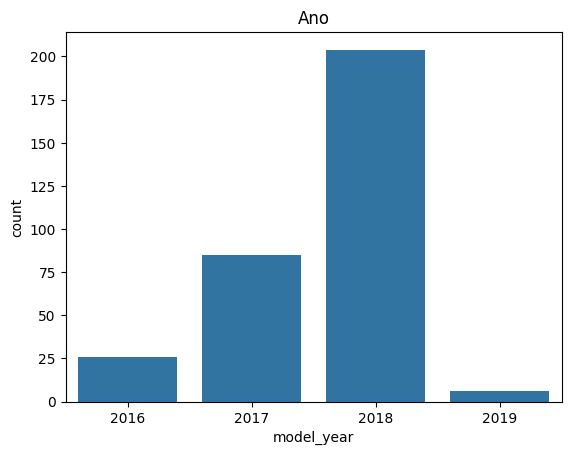

In [16]:
# Contagem de valores por Ano
sns.countplot(x='model_year', data=pandas_df)
plt.title("Ano")
plt.show()

Remoção de Linhas com Valores Nulos

In [17]:
# Removendo linhas com valores nulos
pandas_df.dropna(inplace=True)

# Verificando se ainda existem valores nulos
print(pandas_df.isnull().sum())

product_id      0
product_name    0
brand_id        0
category_id     0
model_year      0
list_price      0
dtype: int64


In [18]:
# Quando tiver dúvida do tipo do dataframe.

print(type(pandas_df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
df.printSchema()

root
 |-- product_id: long (nullable = true)
 |-- product_name: string (nullable = true)
 |-- brand_id: long (nullable = true)
 |-- category_id: long (nullable = true)
 |-- model_year: long (nullable = true)
 |-- list_price: double (nullable = true)



- Concatenando em uma nova coluna


In [20]:
# Estatísticas descritivas para todas as colunas (inclusive categóricas)
pandas_df.describe(include='all')


,product_id,product_name,brand_id,category_id,model_year,list_price
count,321.000000,321,321.000000,321.000000,321.000000,321.000000
unique,NaN,291,NaN,NaN,NaN,NaN
top,NaN,Electra Townie Go! 8i - 2017/2018,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN
mean,161.000000,NaN,5.476636,4.028037,2017.591900,1520.591402
std,92.808944,NaN,3.708131,2.188569,0.665063,1612.152765
min,1.000000,NaN,1.000000,1.000000,2016.000000,89.990000
25%,81.000000,NaN,1.000000,2.000000,2017.000000,439.990000
50%,161.000000,NaN,7.000000,3.000000,2018.000000,761.990000
75%,241.000000,NaN,9.000000,6.000000,2018.000000,2299.990000


In [22]:
display(pandas_df.head())

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99


DataFrame no console (pode ser grande para grandes conjuntos de dados)


In [23]:
print(pandas_df.to_string())

     product_id                                           product_name  brand_id  category_id  model_year  list_price
0             1                                        Trek 820 - 2016         9            6        2016      379.99
1             2                     Ritchey Timberwolf Frameset - 2016         5            6        2016      749.99
2             3                        Surly Wednesday Frameset - 2016         8            6        2016      999.99
3             4                               Trek Fuel EX 8 29 - 2016         9            6        2016     2899.99
4             5                           Heller Shagamaw Frame - 2016         3            6        2016     1320.99
5             6                  Surly Ice Cream Truck Frameset - 2016         8            6        2016      469.99
6             7                               Trek Slash 8 27.5 - 2016         9            6        2016     3999.99
7             8                  Trek Remedy 29 Carbon F

In [25]:
# Ver os nomes das colunas
pandas_df.columns

Index(['product_id', 'product_name', 'brand_id', 'category_id', 'model_year',
       'list_price'],
      dtype='object')

In [26]:
pandas_df.dtypes

,0
product_id,int64
product_name,object
brand_id,int64
category_id,int64
model_year,int64
list_price,float64


> Observação:
- Para contar apenas o número total de ocorrências de cada produto, é melhor usar o método .size() ou contar uma coluna específica.

In [36]:
TotalAno = pandas_df.groupby('model_year').size()
print(f' Total Por Ano é: \n{TotalAno}')

 Total Por Ano é: 
model_year
2016     26
2017     85
2018    204
2019      6
dtype: int64


###  Usando .value_counts() (mais direto para contagens simples)

In [39]:
counts = pandas_df['model_year'].value_counts()
# Exibir o resultado
print(counts)


model_year
2018    204
2017     85
2016     26
2019      6
Name: count, dtype: int64


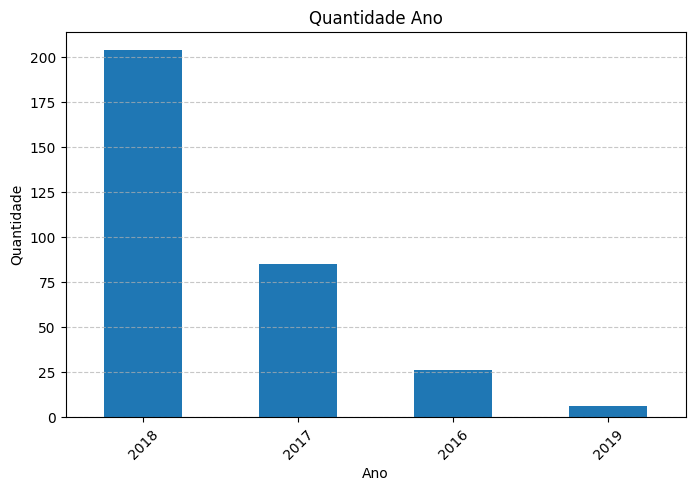

In [42]:
# Criando um gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title("Quantidade Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

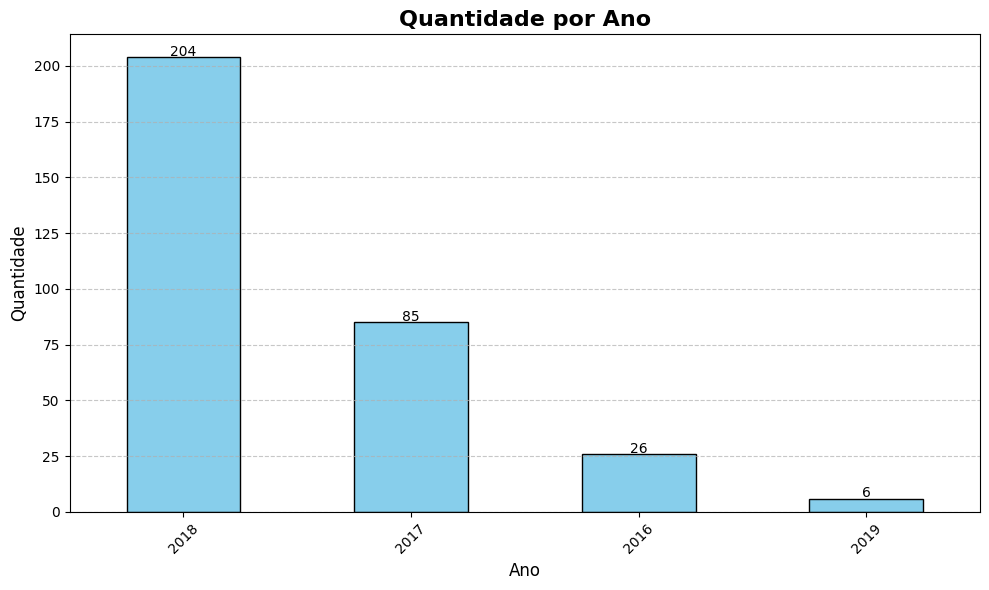

In [43]:
plt.figure(figsize=(10, 6))

# Personalizando as cores das barras
counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title("Quantidade por Ano", fontsize=16, fontweight='bold')
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

# Melhorando a legibilidade dos rótulos no eixo X
plt.xticks(rotation=45, fontsize=10)

# Exibindo valores no topo de cada barra
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='black')

# Adicionando uma grade mais estilizada
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()
